In [1]:

from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling1D,Flatten,SpatialDropout1D,Bidirectional,LSTM
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import model_selection
from matplotlib import pyplot
import seaborn as sns
def metrics(expected , predicted):
  # Mean absolute error
  print("The rmse is " + str(np.sqrt(mean_squared_error(expected, predicted))))
  print("The mae is " + str(mean_absolute_error(expected, predicted)))
  print("The r2 is " + str(r2_score(expected, predicted)))
  print("Standard Deviation of predicted" + str(np.std(predicted)))
  plt.figure()
  ax1 = sns.distplot(predicted)
  ax2 = sns.distplot(expected)
  plt.axvline(np.mean(predicted) , color='b' , linestyle='dashed' , linewidth='2')
  plt.axvline(np.mean(expected) , color='orange' , linestyle='dashed' , linewidth='2')
  # pyplot.plot(err)
  # pyplot.xticks(ticks=[i for i in range(len(err))], labels=predicted)
  # pyplot.xlabel('Predicted Value')
  # pyplot.ylabel('Mean Squared Error')
  # pyplot.show()
  # mean sq error
  # r2


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"krishnamore","key":"df55c491fc34572b85d7be811b100322"}'}

In [4]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d danielwillgeorge/glove6b100dtxt

cp: cannot create regular file '/root/.kaggle/': Not a directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [5]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2022-02-25 11:45:15--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-02-25 11:45:15--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-02-25 11:45:16--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [6]:
!unzip "/content/glove.6B.zip" -d "/content/"

Archive:  /content/glove.6B.zip
replace /content/glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/glove.6B.50d.txt  
replace /content/glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/glove.6B.100d.txt  y

replace /content/glove.6B.200d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: /content/glove.6B.200d.txt  y
y
y
y

replace /content/glove.6B.300d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: /content/glove.6B.300d.txt  y
y



In [7]:
!wget https://raw.githubusercontent.com/krishnaaxo/Rev.Conf/main/2018_iclr.csv
!wget https://raw.githubusercontent.com/krishnaaxo/Rev.Conf/main/2019_iclr.csv
!wget https://raw.githubusercontent.com/krishnaaxo/Rev.Conf/main/2021_iclr.csv

y
--2022-02-25 11:49:04--  https://raw.githubusercontent.com/krishnaaxo/Rev.Conf/main/2018_iclr.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7596883 (7.2M) [text/plain]
Saving to: ‘2018_iclr.csv’

2018_iclr.csv       100%[===================>]   7.24M  --.-KB/s    in 0.04s   

2022-02-25 11:49:04 (202 MB/s) - ‘2018_iclr.csv’ saved [7596883/7596883]

--2022-02-25 11:49:04--  https://raw.githubusercontent.com/krishnaaxo/Rev.Conf/main/2019_iclr.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13121594 (13M) [text/plain]
Sav

In [8]:
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [9]:
df = pd.read_csv('2019_iclr.csv')
df['confidence'] = df['confidence'].astype(str).str[0]
df['review'] = df['review']
review = df[['confidence','review']]
review = review.dropna(axis=0)

In [10]:
review['confidence'] = review['confidence'].astype(int) -1

In [11]:
review

,confidence,review
0,4,The paper proposes an approach to learn nonlin...
1,3,"This paper aims to estimate time-delayed, nonl..."
2,3,"In the manuscript entitled ""Neural Causal Disc..."
4,4,Major Contribution:\nThis paper details a meth...
5,3,# Summary\n\nThis submission proposes a multi-...
...,...,...
6177,3,"This is an novel, interesting paper on an impo..."
6178,4,Summary:\nIn the semi-supervised self-training...
6179,2,The authors present a method on prediction of ...
6180,4,Summary:\nThe paper reformulates the task of v...


In [12]:
df=review
df.head()

,confidence,review
0,4,The paper proposes an approach to learn nonlin...
1,3,"This paper aims to estimate time-delayed, nonl..."
2,3,"In the manuscript entitled ""Neural Causal Disc..."
4,4,Major Contribution:\nThis paper details a meth...
5,3,# Summary\n\nThis submission proposes a multi-...


In [13]:
reviews = list(df['review'])

In [14]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in tqdm(reviews):
    review = re.sub('[^a-zA-Z]', ' ', i)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


100%|██████████| 4764/4764 [04:00<00:00, 19.85it/s]


In [15]:
embedding_dict={}
with open('/content/glove.6B.100d.txt','r') as f:
    for line in tqdm(f):
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

400000it [00:08, 45923.21it/s]


In [16]:
MAX_LEN=256
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [17]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 16309


In [18]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec
            

100%|██████████| 16309/16309 [00:00<00:00, 620497.67it/s]


In [19]:
y = df.iloc[:, 0].values
# y = label_binarize(y, classes=[1, 2, 3, 4, 5])
n_classes = 5

In [20]:
y

array([4, 3, 3, ..., 2, 4, 3])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweet_pad, y, test_size = 0.20, random_state = 0)

In [22]:
print(X_train.shape)
print(y_train.shape)

(3811, 256)
(3811,)


In [23]:
model = Sequential()
embedding=Embedding(num_words,100,embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(16, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Flatten())
model.add(Dense(1, kernel_initializer='normal', activation='relu'))
optimzer=Adam(learning_rate=1e-5)
    
model.compile(loss='mean_squared_error',optimizer=optimzer)     
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 100)          1631000   
                                                                 
 dense (Dense)               (None, 256, 128)          12928     
                                                                 
 dense_1 (Dense)             (None, 256, 64)           8256      
                                                                 
 dense_2 (Dense)             (None, 256, 32)           2080      
                                                                 
 dense_3 (Dense)             (None, 256, 16)           528       
                                                                 
 dense_4 (Dense)             (None, 256, 8)            136       
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [24]:
model.fit(X_train,y_train,batch_size=16,epochs=100)

Epoch 1/100
239/239 [==============================] - 4s 4ms/step - loss: 8.3061
Epoch 2/100
239/239 [==============================] - 1s 4ms/step - loss: 7.9472
Epoch 3/100
239/239 [==============================] - 1s 4ms/step - loss: 7.0285
Epoch 4/100
239/239 [==============================] - 1s 4ms/step - loss: 4.8338
Epoch 5/100
239/239 [==============================] - 1s 4ms/step - loss: 1.7816
Epoch 6/100
239/239 [==============================] - 1s 4ms/step - loss: 0.9117
Epoch 7/100
239/239 [==============================] - 1s 4ms/step - loss: 0.8861
Epoch 8/100
239/239 [==============================] - 1s 4ms/step - loss: 0.8662
Epoch 9/100
239/239 [==============================] - 1s 4ms/step - loss: 0.8473
Epoch 10/100
239/239 [==============================] - 1s 4ms/step - loss: 0.8296
Epoch 11/100
239/239 [==============================] - 1s 4ms/step - loss: 0.8132
Epoch 12/100
239/239 [==============================] - 1s 4ms/step - loss: 0.7977
Epoch 13/100


In [25]:
predicted = model.predict(X_test)

The rmse is 0.8195073250085853
The mae is 0.6384045469798422
The r2 is 0.05158565405032589
Standard Deviation of predicted0.19778195
And for training values -------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


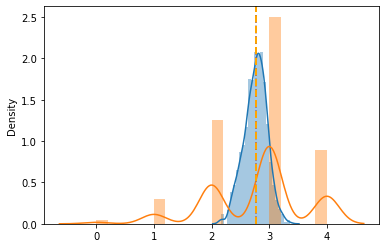

In [26]:
metrics(y_test , predicted)
print("And for training values -------------------")


The rmse is 0.7967304103229518
The mae is 0.6177449698712187
The r2 is 0.07407102585431335
Standard Deviation of predicted0.19518371


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


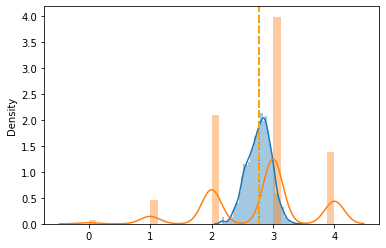

In [27]:
predicted2 = model.predict(X_train)
metrics(y_train , predicted2)